Entrenamiento de parametros (similar a notebook "trainable slope and bias") pero con digitos limpios

In [7]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
import numpy as np
from keras.models import load_model

from custom_layers.Sampling import Sampling
from custom_layers.ReshapeLayer import ReshapeLayer

from data.get_data import get_mnist_data
from models_definitions.cvae import CVAE
from inference.inference import unmix


data = get_mnist_data("fashion")

x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  

encoder = load_model(
    "../../trained_models/encoders_fashion/en_int_256_lat_128_fashion.keras",
    custom_objects={"Sampling": Sampling},
)

decoder = load_model(
    "../../trained_models/decoders_fashion/de_int_256_lat_128_fashion.keras"
)

cvae = CVAE(encoder=encoder, decoder=decoder, original_dim=28 * 28, beta=1)

predictor = load_model(
    "../../trained_models/predictores/CCE_Conv2D_fashion.keras",
    {"ReshapeLayer": ReshapeLayer},
)


def objective(trial):
    bias = trial.suggest_float("bias", 0.1, 1)
    slope = trial.suggest_float("slope", 1, 10)

    # print(f"Probando bias={bias}, slope={slope}")

    try:
        metrics = unmix(
            x_train[:1000],
            x_train[:1000],
            y_train[:1000],
            y_train[:1000],
            cvae,
            predictor,
            bias=bias,
            slope=slope,
            Iterations=3,
        )

        print(f"metricas {metrics["bpsnr_d"]}")
        return metrics["bpsnr_d"][0]

    except Exception as e:
        print(f"Error con bias={bias}, slope={slope}: {e}")
        # Podés penalizarlorandom.seed(SEED) con un valor muy alto
        return float("inf")
    

import optuna

# Creamos un estudio de minimización
SEED = 42

np.random.seed(SEED)

sampler = optuna.samplers.TPESampler(seed=SEED)

study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=50) 

# Mostramos los mejores resultados
print("\n📊 Mejores hiperparámetros encontrados:")
print(study.best_params)
print("🔽 Mejor bpsnr_mean:", study.best_value)


Usando fashion como dataset


[I 2025-08-15 00:37:47,653] A new study created in memory with name: no-name-d75171ba-cc41-418f-8767-d9617074615c
[I 2025-08-15 00:37:50,801] Trial 0 finished with value: 14.80046272277832 and parameters: {'bias': 0.4370861069626263, 'slope': 9.556428757689245}. Best is trial 0 with value: 14.80046272277832.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.80046272277832>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0965938568115234>)


[I 2025-08-15 00:37:53,784] Trial 1 finished with value: 13.699804306030273 and parameters: {'bias': 0.7587945476302645, 'slope': 6.387926357773329}. Best is trial 0 with value: 14.80046272277832.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=13.699804306030273>, <tf.Tensor: shape=(), dtype=float32, numpy=1.8952422142028809>)


[I 2025-08-15 00:37:56,728] Trial 2 finished with value: 10.148880004882812 and parameters: {'bias': 0.24041677639819287, 'slope': 2.403950683025824}. Best is trial 0 with value: 14.80046272277832.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=10.148880004882812>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8913331627845764>)


[I 2025-08-15 00:37:59,676] Trial 3 finished with value: 10.669510841369629 and parameters: {'bias': 0.15227525095137953, 'slope': 8.795585311974417}. Best is trial 0 with value: 14.80046272277832.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=10.669510841369629>, <tf.Tensor: shape=(), dtype=float32, numpy=1.0630470514297485>)


[I 2025-08-15 00:38:02,580] Trial 4 finished with value: 14.451667785644531 and parameters: {'bias': 0.6410035105688879, 'slope': 7.372653200164409}. Best is trial 0 with value: 14.80046272277832.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.451667785644531>, <tf.Tensor: shape=(), dtype=float32, numpy=2.3279359340667725>)


[I 2025-08-15 00:38:05,506] Trial 5 finished with value: 9.746060371398926 and parameters: {'bias': 0.1185260448662222, 'slope': 9.72918866945795}. Best is trial 0 with value: 14.80046272277832.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=9.746060371398926>, <tf.Tensor: shape=(), dtype=float32, numpy=1.027074933052063>)


[I 2025-08-15 00:38:08,417] Trial 6 finished with value: 13.677189826965332 and parameters: {'bias': 0.8491983767203796, 'slope': 2.9110519961044856}. Best is trial 0 with value: 14.80046272277832.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=13.677189826965332>, <tf.Tensor: shape=(), dtype=float32, numpy=2.3121485710144043>)


[I 2025-08-15 00:38:11,379] Trial 7 finished with value: 10.63643741607666 and parameters: {'bias': 0.26364247048639056, 'slope': 2.650640588680904}. Best is trial 0 with value: 14.80046272277832.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=10.63643741607666>, <tf.Tensor: shape=(), dtype=float32, numpy=0.8866187334060669>)


[I 2025-08-15 00:38:14,338] Trial 8 finished with value: 14.950035095214844 and parameters: {'bias': 0.373818018663584, 'slope': 5.72280788469014}. Best is trial 8 with value: 14.950035095214844.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.950035095214844>, <tf.Tensor: shape=(), dtype=float32, numpy=1.721573829650879>)


[I 2025-08-15 00:38:17,267] Trial 9 finished with value: 14.53555965423584 and parameters: {'bias': 0.48875051677790415, 'slope': 3.6210622617823773}. Best is trial 8 with value: 14.950035095214844.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.53555965423584>, <tf.Tensor: shape=(), dtype=float32, numpy=1.1345274448394775>)


[I 2025-08-15 00:38:20,208] Trial 10 finished with value: 14.304130554199219 and parameters: {'bias': 0.38021080133309326, 'slope': 4.518449660564502}. Best is trial 8 with value: 14.950035095214844.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.304130554199219>, <tf.Tensor: shape=(), dtype=float32, numpy=1.204671859741211>)


[I 2025-08-15 00:38:23,104] Trial 11 finished with value: 15.630773544311523 and parameters: {'bias': 0.4599073206083659, 'slope': 7.493449422596839}. Best is trial 11 with value: 15.630773544311523.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.630773544311523>, <tf.Tensor: shape=(), dtype=float32, numpy=2.8701717853546143>)


[I 2025-08-15 00:38:25,983] Trial 12 finished with value: 15.340890884399414 and parameters: {'bias': 0.6147137278139406, 'slope': 5.75349904288968}. Best is trial 11 with value: 15.630773544311523.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.340890884399414>, <tf.Tensor: shape=(), dtype=float32, numpy=2.120514154434204>)


[I 2025-08-15 00:38:28,844] Trial 13 finished with value: 14.621484756469727 and parameters: {'bias': 0.6224076775310103, 'slope': 7.347473720257968}. Best is trial 11 with value: 15.630773544311523.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.621484756469727>, <tf.Tensor: shape=(), dtype=float32, numpy=2.4659156799316406>)


[I 2025-08-15 00:38:31,762] Trial 14 finished with value: 11.199142456054688 and parameters: {'bias': 0.9522656887511343, 'slope': 1.1185905921700625}. Best is trial 11 with value: 15.630773544311523.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=11.199142456054688>, <tf.Tensor: shape=(), dtype=float32, numpy=1.3498289585113525>)


[I 2025-08-15 00:38:34,668] Trial 15 finished with value: 14.77851390838623 and parameters: {'bias': 0.5888444381653375, 'slope': 7.726547685746881}. Best is trial 11 with value: 15.630773544311523.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.77851390838623>, <tf.Tensor: shape=(), dtype=float32, numpy=2.7444956302642822>)


[I 2025-08-15 00:38:37,527] Trial 16 finished with value: 14.667119026184082 and parameters: {'bias': 0.7169505285273503, 'slope': 4.9092064458077}. Best is trial 11 with value: 15.630773544311523.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.667119026184082>, <tf.Tensor: shape=(), dtype=float32, numpy=2.072067975997925>)


[I 2025-08-15 00:38:40,425] Trial 17 finished with value: 15.806262016296387 and parameters: {'bias': 0.5244792728687445, 'slope': 6.260037392559797}. Best is trial 17 with value: 15.806262016296387.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.806262016296387>, <tf.Tensor: shape=(), dtype=float32, numpy=2.5283803939819336>)


[I 2025-08-15 00:38:43,299] Trial 18 finished with value: 15.844925880432129 and parameters: {'bias': 0.4844010750699986, 'slope': 6.691562051943439}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.844925880432129>, <tf.Tensor: shape=(), dtype=float32, numpy=2.675729274749756>)


[I 2025-08-15 00:38:46,237] Trial 19 finished with value: 13.81144905090332 and parameters: {'bias': 0.294252436641597, 'slope': 6.671214458678047}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=13.81144905090332>, <tf.Tensor: shape=(), dtype=float32, numpy=1.489484429359436>)


[I 2025-08-15 00:38:49,123] Trial 20 finished with value: 14.704256057739258 and parameters: {'bias': 0.5423927964931735, 'slope': 8.767542764185698}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.704256057739258>, <tf.Tensor: shape=(), dtype=float32, numpy=3.1466495990753174>)


[I 2025-08-15 00:38:52,014] Trial 21 finished with value: 15.249649047851562 and parameters: {'bias': 0.4886937593569223, 'slope': 8.189001647363838}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.249649047851562>, <tf.Tensor: shape=(), dtype=float32, numpy=3.1238064765930176>)


[I 2025-08-15 00:38:54,928] Trial 22 finished with value: 15.381120681762695 and parameters: {'bias': 0.39553693474545304, 'slope': 6.8728555227819506}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.381120681762695>, <tf.Tensor: shape=(), dtype=float32, numpy=2.3585691452026367>)


[I 2025-08-15 00:38:57,863] Trial 23 finished with value: 15.81197738647461 and parameters: {'bias': 0.5177212265557561, 'slope': 4.903201704986699}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.81197738647461>, <tf.Tensor: shape=(), dtype=float32, numpy=1.8593913316726685>)


[I 2025-08-15 00:39:00,731] Trial 24 finished with value: 14.641368865966797 and parameters: {'bias': 0.7194963473852007, 'slope': 4.882507530577785}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.641368865966797>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0742201805114746>)


[I 2025-08-15 00:39:03,665] Trial 25 finished with value: 15.371695518493652 and parameters: {'bias': 0.545473920747947, 'slope': 4.066173102004596}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.371695518493652>, <tf.Tensor: shape=(), dtype=float32, numpy=1.5364176034927368>)


[I 2025-08-15 00:39:06,989] Trial 26 finished with value: 14.656903266906738 and parameters: {'bias': 0.3500815176644614, 'slope': 6.022726287584395}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.656903266906738>, <tf.Tensor: shape=(), dtype=float32, numpy=1.6856095790863037>)


[I 2025-08-15 00:39:10,496] Trial 27 finished with value: 15.034712791442871 and parameters: {'bias': 0.6724020999244624, 'slope': 5.152643555381989}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.034712791442871>, <tf.Tensor: shape=(), dtype=float32, numpy=2.007646083831787>)


[I 2025-08-15 00:39:14,024] Trial 28 finished with value: 13.863280296325684 and parameters: {'bias': 0.8237502673992994, 'slope': 3.7310167079970213}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=13.863280296325684>, <tf.Tensor: shape=(), dtype=float32, numpy=2.303574800491333>)


[I 2025-08-15 00:39:16,936] Trial 29 finished with value: 15.678022384643555 and parameters: {'bias': 0.5457150063247238, 'slope': 6.325182793682828}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.678022384643555>, <tf.Tensor: shape=(), dtype=float32, numpy=2.546454906463623>)


[I 2025-08-15 00:39:20,404] Trial 30 finished with value: 15.752803802490234 and parameters: {'bias': 0.4567342947946711, 'slope': 5.416805753198281}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.752803802490234>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0015506744384766>)


[I 2025-08-15 00:39:24,380] Trial 31 finished with value: 15.682104110717773 and parameters: {'bias': 0.4427818493001435, 'slope': 5.53707646269114}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.682104110717773>, <tf.Tensor: shape=(), dtype=float32, numpy=2.004096508026123>)


[I 2025-08-15 00:39:27,575] Trial 32 finished with value: 15.683890342712402 and parameters: {'bias': 0.5148016426990631, 'slope': 6.8391515789279875}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.683890342712402>, <tf.Tensor: shape=(), dtype=float32, numpy=2.731290817260742>)


[I 2025-08-15 00:39:33,439] Trial 33 finished with value: 13.517984390258789 and parameters: {'bias': 0.33937765666160524, 'slope': 4.384261320456579}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=13.517984390258789>, <tf.Tensor: shape=(), dtype=float32, numpy=1.0738414525985718>)


[I 2025-08-15 00:39:38,572] Trial 34 finished with value: 15.689682960510254 and parameters: {'bias': 0.4275792175706821, 'slope': 6.178388847216386}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.689682960510254>, <tf.Tensor: shape=(), dtype=float32, numpy=2.2736124992370605>)


[I 2025-08-15 00:39:42,993] Trial 35 finished with value: 15.471822738647461 and parameters: {'bias': 0.43476745115557147, 'slope': 5.177498464404562}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.471822738647461>, <tf.Tensor: shape=(), dtype=float32, numpy=1.757434606552124>)


[I 2025-08-15 00:39:46,537] Trial 36 finished with value: 14.45065975189209 and parameters: {'bias': 0.5858716694191165, 'slope': 3.191751088761642}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.45065975189209>, <tf.Tensor: shape=(), dtype=float32, numpy=1.4272857904434204>)


[I 2025-08-15 00:39:49,597] Trial 37 finished with value: 13.78284740447998 and parameters: {'bias': 0.6751573634917576, 'slope': 8.43930011118238}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=13.78284740447998>, <tf.Tensor: shape=(), dtype=float32, numpy=2.220278263092041>)


[I 2025-08-15 00:39:53,640] Trial 38 finished with value: 12.258681297302246 and parameters: {'bias': 0.22673239358826658, 'slope': 6.633981323438212}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=12.258681297302246>, <tf.Tensor: shape=(), dtype=float32, numpy=1.1134127378463745>)


[I 2025-08-15 00:39:57,035] Trial 39 finished with value: 10.992501258850098 and parameters: {'bias': 0.19119727298237837, 'slope': 5.389577807304999}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=10.992501258850098>, <tf.Tensor: shape=(), dtype=float32, numpy=0.9300281405448914>)


[I 2025-08-15 00:40:00,829] Trial 40 finished with value: 14.844573974609375 and parameters: {'bias': 0.4937455078839213, 'slope': 9.134528587461554}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.844573974609375>, <tf.Tensor: shape=(), dtype=float32, numpy=3.2728023529052734>)


[I 2025-08-15 00:40:04,486] Trial 41 finished with value: 15.613031387329102 and parameters: {'bias': 0.4225512563114876, 'slope': 5.923992064650557}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.613031387329102>, <tf.Tensor: shape=(), dtype=float32, numpy=2.120281219482422>)


[I 2025-08-15 00:40:08,213] Trial 42 finished with value: 14.0911226272583 and parameters: {'bias': 0.3140992973599794, 'slope': 6.253283796219082}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.0911226272583>, <tf.Tensor: shape=(), dtype=float32, numpy=1.5122214555740356>)


[I 2025-08-15 00:40:12,580] Trial 43 finished with value: 14.745333671569824 and parameters: {'bias': 0.4093400407864, 'slope': 4.552695888390171}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=14.745333671569824>, <tf.Tensor: shape=(), dtype=float32, numpy=1.3089375495910645>)


[I 2025-08-15 00:40:16,545] Trial 44 finished with value: 15.711006164550781 and parameters: {'bias': 0.47502262486399016, 'slope': 7.157190408811128}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.711006164550781>, <tf.Tensor: shape=(), dtype=float32, numpy=2.8220791816711426>)


[I 2025-08-15 00:40:19,826] Trial 45 finished with value: 15.062341690063477 and parameters: {'bias': 0.5874193944315137, 'slope': 7.041132706154965}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.062341690063477>, <tf.Tensor: shape=(), dtype=float32, numpy=2.61873197555542>)


[I 2025-08-15 00:40:23,023] Trial 46 finished with value: 15.233593940734863 and parameters: {'bias': 0.5101076273254482, 'slope': 8.082299453771583}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.233593940734863>, <tf.Tensor: shape=(), dtype=float32, numpy=3.123375654220581>)


[I 2025-08-15 00:40:26,858] Trial 47 finished with value: 15.495972633361816 and parameters: {'bias': 0.47896574454289814, 'slope': 7.722168957354008}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.495972633361816>, <tf.Tensor: shape=(), dtype=float32, numpy=2.980661153793335>)


[I 2025-08-15 00:40:29,782] Trial 48 finished with value: 12.190382957458496 and parameters: {'bias': 0.6333570840415056, 'slope': 1.8835328318411326}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=12.190382957458496>, <tf.Tensor: shape=(), dtype=float32, numpy=1.096764087677002>)


[I 2025-08-15 00:40:32,628] Trial 49 finished with value: 15.019871711730957 and parameters: {'bias': 0.36614195449143794, 'slope': 7.433077019201731}. Best is trial 18 with value: 15.844925880432129.


metricas (<tf.Tensor: shape=(), dtype=float32, numpy=15.019871711730957>, <tf.Tensor: shape=(), dtype=float32, numpy=2.300560474395752>)

📊 Mejores hiperparámetros encontrados:
{'bias': 0.4844010750699986, 'slope': 6.691562051943439}
🔽 Mejor bpsnr_mean: 15.844925880432129


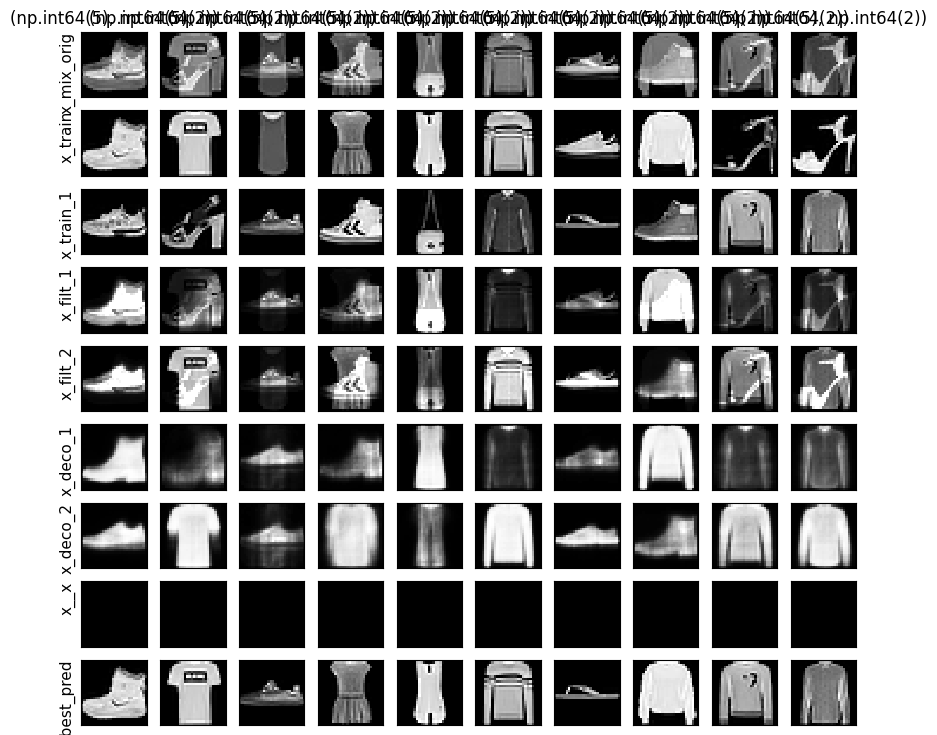

In [8]:
metrics = unmix(
    x_train[:1000],
    x_train_1[:1000],
    y_train[:1000],
    y_train_1[:1000],
    cvae,
    predictor,
    bias=study.best_params["bias"],
    slope=study.best_params["slope"],
    Iterations=5,
    show_graph=True,
)



In [ ]:
num_images=1000
metrics = unmix(
    x_train[:num_images],
    x_train_1[:num_images],
    y_train[:num_images],
    y_train_1[:num_images],
    cvae,
    predictor,
    Iterations=1,
)


metrics_op = unmix(
    x_train[:num_images],
    x_train_1[:num_images],
    y_train[:num_images],
    y_train_1[:num_images],
    cvae,
    predictor,
    bias=0.256,
    slope=10,
    Iterations=1,
)

predictions_1 = metrics["predictions_1"]
predictions_2 = metrics["predictions_2"]

predictions_1_op = metrics_op["predictions_1"]
predictions_2_op = metrics_op["predictions_2"]


def accuracys(p1,p2,y1,y2):
    p1_max = np.argmax(p1, axis=1)
    p2_max = np.argmax(p2, axis=1)
    y1_max = np.argmax(y1, axis=1)
    y2_max = np.argmax(y2, axis=1)

    at_least_one = ((p1_max == y1_max) |
           (p1_max == y2_max) |
           (p2_max == y1_max) |
           (p2_max == y2_max)).astype(int)

    pred_pairs = np.sort(np.stack([p1_max, p2_max], axis=1), axis=1)
    y_pairs = np.sort(np.stack([y1_max, y2_max], axis=1), axis=1)

    both = np.all(pred_pairs == y_pairs, axis=1).astype(int)

    acc_at_least_one = np.count_nonzero(at_least_one)/len(at_least_one)
    acc_both =  np.count_nonzero(both)/len(both)

    return acc_at_least_one, acc_both
    

acc_at_least_one, acc_both = accuracys( predictions_1, predictions_2, y_train[:num_images], y_train_1[:num_images])

acc_at_least_one_op, acc_both_op = accuracys( predictions_1_op, predictions_2_op, y_train[:num_images], y_train_1[:num_images])

print(f"al menos uno: default:  {acc_at_least_one} opt: {acc_at_least_one_op}  ")
print(f"ambos: default:  {acc_both} opt: {acc_both_op}  ")





al menos uno: default:  0.945 opt: 0.935  
ambos: default:  0.516 opt: 0.467  
